<a href="https://colab.research.google.com/github/Twixx10/MachineLearningTASK/blob/main/Week2/02_Classification_Model_CitarumWater_M_Rakan_Bagus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mengimpor pustaka yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler  # Mengimpor StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix
)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Path ke file CSV
file_path = '/content/drive/MyDrive/Machine Learning/Dataset/CitarumWater.csv'

# Membaca file CSV
data = pd.read_csv(file_path)

In [ ]:
# Tampilkan beberapa baris data
print(data.head())

# Tampilkan semua nama kolom
print(data.columns)

# Memeriksa tipe data kolom
print(data.dtypes)

   No NamaSungai             TitikPantau       Waktu    pH     Temp   TSS  \
0   1    Citarum             Wangisagara  18/04/2018  7.57  25.55°C  11.0   
1   2    Citarum                   Koyod  18/04/2018  7.69  25.55°C  13.0   
2   3    Citarum   Setelah IPAL Cisirung  18/04/2018  7.39  25.55°C  15.0   
3   4    Citarum                 Nanjung  18/04/2018  7.49  25.55°C  17.0   
4   5    Citarum  Outlet Waduk Jatiluhur  18/04/2018  7.17  25.55°C   6.0   

     DO   BOD    COD  Nitrat  FecalColiform  Fosfat O2    IP  Class  
0  6.11  3.30   6.10    1.08        17000.0   0.043  -  5.12      3  
1  6.20  5.31  12.50    1.85        28000.0   0.011  -  5.91      3  
2  3.61  7.40  23.50    1.25        90000.0   0.230  -  7.76      3  
3  3.17  8.13  27.50    1.21       300000.0   0.057  -  9.61      3  
4  6.82  2.89   5.44    1.04         3000.0   0.110  -  2.44      2  
Index(['No', 'NamaSungai', 'TitikPantau', 'Waktu', 'pH', 'Temp', 'TSS', 'DO',
       'BOD', 'COD', 'Nitrat', 'FecalCo

Shape of y_test: (500,)
Shape of y_pred: (500,)
Metrik Evaluasi:
Akurasi: 0.96
Presisi: 0.96
Recall: 0.96
F1-Score: 0.96
AUC: 1.00
Shape of confusion matrix: (4, 4)


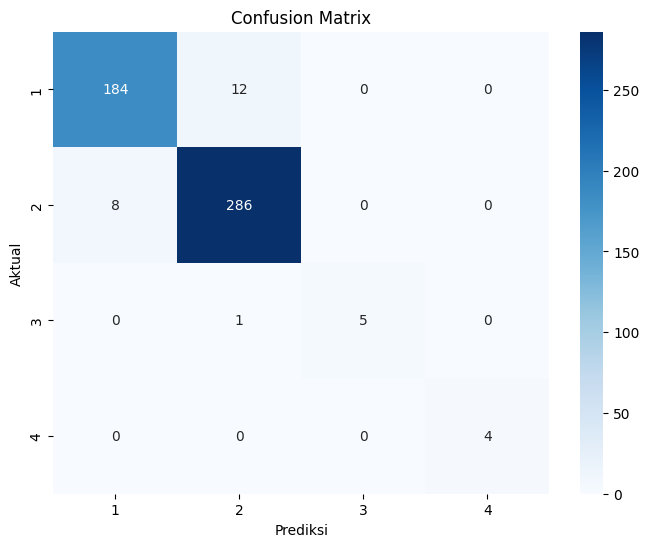

Karena ada lebih dari dua kelas, ROC Curve tidak dapat dihitung dengan cara ini.


In [ ]:
# Membersihkan data: Mengonversi 'Temp' menjadi string, jika tidak
data['Temp'] = data['Temp'].astype(str).str.replace('°C', '')  # Menghapus '°C'
data['Temp'] = data['Temp'].astype(float)  # Mengonversi ke float

# Mengonversi pH ke float
data['pH'] = data['pH'].astype(float)

# Menghapus kolom yang tidak diperlukan jika ada
columns_to_drop = ['No', 'NamaSungai', 'TitikPantau', 'Waktu']
data = data.drop(columns=[col for col in columns_to_drop if col in data.columns], errors='ignore')

# Mengganti kolom target dengan nama yang tepat dalam dataset
target_column = 'Class'  # Kolom target yang benar
X = data.drop(columns=[target_column])  # Memisahkan fitur
y = data[target_column]  # Memisahkan target

# Melakukan One-Hot Encoding pada kolom kategorikal jika ada
X = pd.get_dummies(X, drop_first=True)  # Mengonversi kolom kategorikal menjadi variabel dummy

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melakukan standardisasi pada data
scaler = StandardScaler()  # Membuat objek scaler
X_train = scaler.fit_transform(X_train)  # Melatih dan mentransformasikan data pelatihan
X_test = scaler.transform(X_test)  # Mentransformasikan data pengujian

# Membangun model Logistic Regression
model = LogisticRegression(max_iter=2000)  # Meningkatkan iterasi maksimum
model.fit(X_train, y_train)  # Melatih model

# Memprediksi pada set pengujian
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)  # Probabilitas untuk setiap kelas

# Pastikan y_pred dan y_test memiliki dimensi yang benar
print("Shape of y_test:", y_test.shape)
print("Shape of y_pred:", y_pred.shape)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Menggunakan average='weighted' untuk multi-class
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Menghitung AUC untuk multi-class
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')  # Menghitung AUC untuk multi-class

# Menampilkan hasil evaluasi
print("Metrik Evaluasi:")
print(f"Akurasi: {accuracy:.2f}")
print(f"Presisi: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC: {roc_auc:.2f}")

# Menghitung dan menampilkan Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Memeriksa dimensi Confusion Matrix
print("Shape of confusion matrix:", cm.shape)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC Curve
# Pastikan untuk menggunakan pos_label yang sesuai jika kita memiliki lebih dari dua kelas
# Periksa jika ada dua kelas atau lebih
if len(np.unique(y)) == 2:
    fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1], pos_label=1)  # Pos label diatur untuk dua kelas
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Garis diagonal
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
else:
    print("Karena ada lebih dari dua kelas, ROC Curve tidak dapat dihitung dengan cara ini.")